In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
url = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'Mutual_Funds.csv')

In [3]:
url

'/Users/deepatamraparani/code/tamraparani/P02-mutual-funds/Mutual_Funds.csv'

In [4]:
# Read Mutual File

mf = pd.read_csv(url)
mf.shape

(29033646, 7)

In [5]:
#First 5 Records
mf.head(100)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
0,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,29-05-2008,10.7205
1,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,28-05-2008,10.7250
2,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,27-05-2008,10.7216
3,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,26-05-2008,10.7206
4,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,23-05-2008,10.7152
...,...,...,...,...,...,...,...
95,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,08-01-2008,10.9111
96,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,07-01-2008,10.9162
97,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,04-01-2008,10.8790
98,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,03-01-2008,10.8614


In [6]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29033646 entries, 0 to 29033645
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Fund_House       object 
 1   Scheme_Type      object 
 2   Scheme_Category  object 
 3   Scheme_Code      int64  
 4   Scheme_Name      object 
 5   Date             object 
 6   NAV              float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ GB


In [7]:
mf.describe()

,Scheme_Code,NAV
count,2.903365e+07,2.903365e+07
mean,1.222114e+05,1.802385e+02
std,1.532330e+04,4.014989e+03
min,1.000270e+05,-6.796493e+03
25%,1.082730e+05,1.048240e+01
50%,1.198620e+05,1.219160e+01
75%,1.355680e+05,2.544830e+01
max,1.518760e+05,1.918470e+06


In [8]:
# Get no of Mutual Fund Schemes
print("Number of Schemes are:",len(set(mf['Scheme_Name'])))

Number of Schemes are: 35350


In [9]:
unique_schemes = mf['Scheme_Name'].unique()
unique_fund_houses = mf['Fund_House'].unique()

num_unique_schemes = len(unique_schemes)
num_unique_fund_houses = len(unique_fund_houses)

print("Number of unique schemes:", num_unique_schemes)
print("Number of unique fund houses:", num_unique_fund_houses)

Number of unique schemes: 35350
Number of unique fund houses: 70


In [10]:
scheme_to_fundhouse_mapping = mf[['Scheme_Name', 'Fund_House']].drop_duplicates()


In [11]:
scheme_to_fundhouse_mapping

,Scheme_Name,Fund_House
0,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Standard Chartered Mutual Fund
531,Grindlays Super Saver Income Fund-GSSIF-Quater...,Standard Chartered Mutual Fund
1062,Grindlays Super Saver Income Fund-GSSIF-Growth,Standard Chartered Mutual Fund
1593,Grindlays Super Saver Income Fund-GSSIF-Annual...,Standard Chartered Mutual Fund
2124,Grindlays Super Saver Income Fund-GSSIF - ST-D...,Standard Chartered Mutual Fund
...,...,...
29033626,NAVI Overnight Fund Regular Plan Daily IDCW Re...,Navi Mutual Fund
29033630,NAVI Overnight Fund Regular Plan Weekly IDCW R...,Navi Mutual Fund
29033634,NAVI Overnight Fund Direct Plan Monthly IDCW R...,Navi Mutual Fund
29033638,NAVI Overnight Fund Direct Plan Growth,Navi Mutual Fund


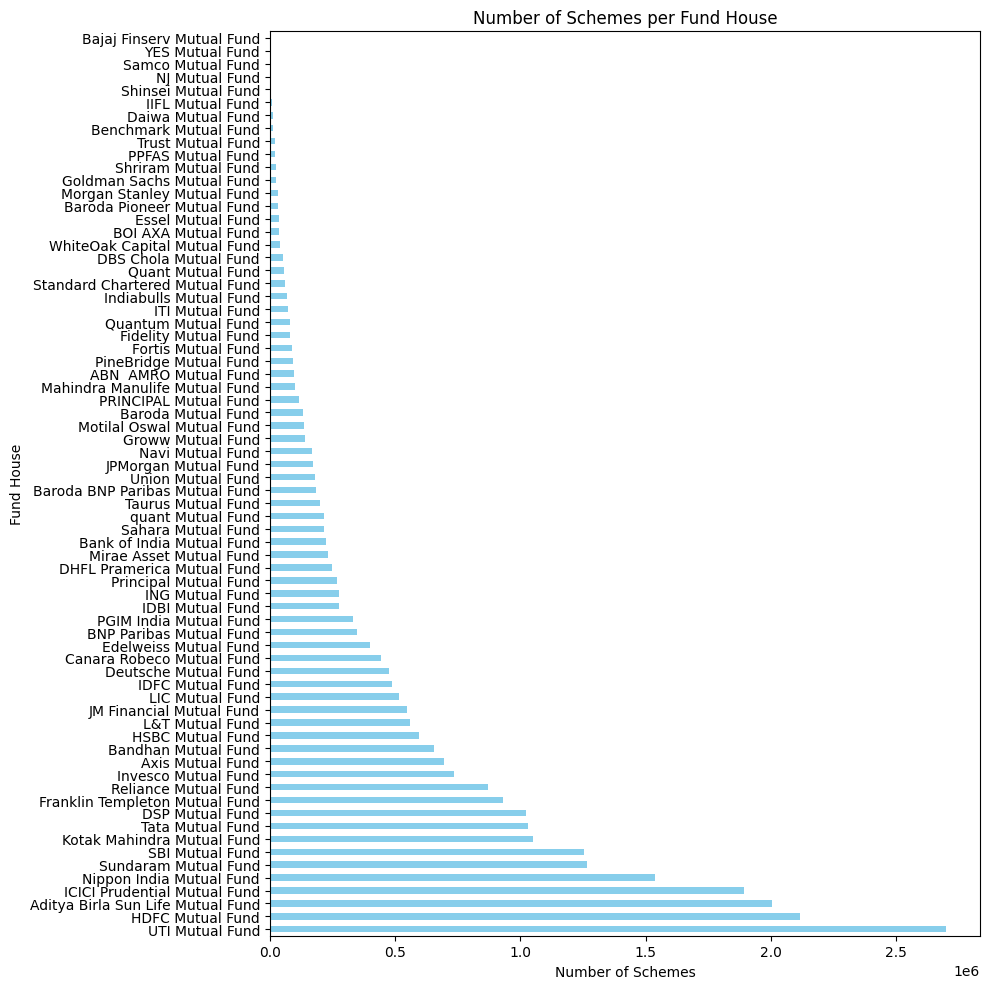

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

fundhouse_scheme_counts = scheme_to_fundhouse_mapping['Fund_House'].value_counts()

# Count the number of schemes per fund house
fundhouse_scheme_counts = mf['Fund_House'].value_counts()

# Plotting a horizontal bar plot
plt.figure(figsize=(10, 10))
fundhouse_scheme_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Schemes')
plt.ylabel('Fund House')
plt.title('Number of Schemes per Fund House')
plt.tight_layout()

# Display plot
plt.show()


In [13]:
mf['Date'] = pd.to_datetime(mf['Date'],format= '%d-%m-%Y')

In [14]:
schemes = mf[['Scheme_Code','Date']].sort_values('Date').groupby('Scheme_Code')


In [15]:
# Get the last date for each scheme
last_dates = schemes.max()
last_dates

,Date
Scheme_Code,
100027,2008-05-29
100028,2008-05-29
100029,2008-05-29
100030,2008-05-29
100031,2008-05-29
...,...
151870,2023-07-21
151873,2023-07-21
151874,2023-07-21


In [16]:
schemes_last_day = last_dates[last_dates['Date'] == '2023-07-21']
schemes_last_day

,Date
Scheme_Code,
100033,2023-07-21
100034,2023-07-21
100037,2023-07-21
100038,2023-07-21
100041,2023-07-21
...,...
151870,2023-07-21
151873,2023-07-21
151874,2023-07-21


In [17]:
schemes_last_day = schemes.nth(-1)
schemes_last_day = schemes_last_day[schemes_last_day['Date']== '2023-07-21']
schemes_last_day = schemes_last_day.reset_index()

In [18]:
relevant_schemes = schemes_last_day['Scheme_Code']

In [19]:
mf = mf[mf['Scheme_Code'].isin(relevant_schemes)]
mf

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
3186,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-21,670.3900
3187,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-20,675.1800
3188,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-19,673.4600
3189,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-18,669.8700
3190,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-17,669.1500
...,...,...,...,...,...,...,...
29033641,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151875,NAVI Overnight Fund Direct Plan Growth,2023-07-18,10.0045
29033642,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151876,NAVI Overnight Fund Direct Plan Weekly IDCW Re...,2023-07-21,10.0096
29033643,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151876,NAVI Overnight Fund Direct Plan Weekly IDCW Re...,2023-07-20,10.0079
29033644,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151876,NAVI Overnight Fund Direct Plan Weekly IDCW Re...,2023-07-19,10.0062


In [20]:
grouped = mf.groupby('Scheme_Code')
mf['Year'] = mf['Date'].dt.year
mf['Month'] = mf['Date'].dt.month
mf[mf['Scheme_Name'] == 'CPSE ETF']
#mf = mf[~mask]

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV,Year,Month
23323182,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-21,44.9035,2023,7
23323183,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-20,44.7496,2023,7
23323184,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-19,44.6004,2023,7
23323185,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-18,44.2261,2023,7
23323186,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-17,44.2407,2023,7
...,...,...,...,...,...,...,...,...,...
23324833,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-11,25.2945,2016,11
23324834,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-10,25.8562,2016,11
23324835,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-09,25.1566,2016,11
23324836,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-08,25.1505,2016,11


In [21]:
min_day = mf.groupby(['Scheme_Code','Year','Month'])['Date'].transform('min')
max_day = mf.groupby(['Scheme_Code','Year','Month'])['Date'].transform('max')


In [22]:
min_day

3186       2023-07-03
3187       2023-07-03
3188       2023-07-03
3189       2023-07-03
3190       2023-07-03
              ...    
29033641   2023-07-18
29033642   2023-07-18
29033643   2023-07-18
29033644   2023-07-18
29033645   2023-07-18
Name: Date, Length: 11460914, dtype: datetime64[ns]

In [23]:
max_day

3186       2023-07-21
3187       2023-07-21
3188       2023-07-21
3189       2023-07-21
3190       2023-07-21
              ...    
29033641   2023-07-21
29033642   2023-07-21
29033643   2023-07-21
29033644   2023-07-21
29033645   2023-07-21
Name: Date, Length: 11460914, dtype: datetime64[ns]

In [24]:
mask = (mf['Date'] == min_day) | (mf['Date'] == max_day)

In [25]:
mf = mf[mask]

In [26]:
mf.count()

Fund_House         1106772
Scheme_Type        1106772
Scheme_Category    1106772
Scheme_Code        1106772
Scheme_Name        1106772
Date               1106772
NAV                1106772
Year               1106772
Month              1106772
dtype: int64

In [27]:
#Scheme Type is the same, however, Scheme Category and Scheme Code are different
mf[mf['Scheme_Name'] == 'CPSE ETF']

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV,Year,Month
23323182,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-21,44.9035,2023,7
23323196,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-03,44.2825,2023,7
23323197,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-06-30,44.2904,2023,6
23323217,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-06-01,41.6786,2023,6
23323218,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-05-31,42.0620,2023,5
...,...,...,...,...,...,...,...,...,...
23324798,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2017-01-02,25.4157,2017,1
23324799,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-12-30,25.3145,2016,12
23324820,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-12-01,25.4610,2016,12
23324821,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-30,25.4652,2016,11


Understanding Forecasting : 

Asset value = 100000€
total_no_of_shares = 100
Debt = 0


NAV = asset_value/total_no_of_shares = 1000€
i_hold_shares = 50
my_value= NAV*i_hold_shares = 1000*(50) = 50000 €

Current picture : 

For this money, 
current_NAV = 20
current_NAV*50 = 1000€

In [28]:
mf.describe()

,Scheme_Code,NAV,Year,Month
count,1.106772e+06,1.106772e+06,1.106772e+06,1.106772e+06
mean,1.207806e+05,2.430971e+02,2.017507e+03,6.407528e+00
std,1.583559e+04,5.674222e+02,4.255172e+00,3.426084e+00
min,1.000330e+05,0.000000e+00,2.006000e+03,1.000000e+00
25%,1.060570e+05,1.133010e+01,2.015000e+03,3.000000e+00
50%,1.190750e+05,1.813045e+01,2.018000e+03,6.000000e+00
75%,1.338680e+05,6.509400e+01,2.021000e+03,9.000000e+00
max,1.518760e+05,6.207543e+03,2.023000e+03,1.200000e+01


In [29]:
mf.head(100)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV,Year,Month
3186,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-21,670.39,2023,7
3200,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-03,655.07,2023,7
3201,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-06-30,653.84,2023,6
3221,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-06-01,625.71,2023,6
3222,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-05-31,626.72,2023,5
...,...,...,...,...,...,...,...,...,...
4165,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2019-08-01,372.83,2019,8
4166,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2019-07-31,375.37,2019,7
4188,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2019-07-01,413.02,2019,7
4189,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2019-06-28,411.38,2019,6


In [37]:
mf.count()

Fund_House         1106772
Scheme_Type        1106772
Scheme_Category    1106772
Scheme_Code        1106772
Scheme_Name        1106772
Date               1106772
NAV                1106772
Year               1106772
Month              1106772
dtype: int64

In [54]:
#filter the dataframe to consist  only last day of the year for every scheme
max_date_of_year = mf.groupby(['Scheme_Code','Year'])['Date'].transform(max)
mask =(mf['Date']==max_date_of_year)
mf=mf[mask]
#filter only teh records between 2018 to 2023
mask_last_five_years = (mf['Year'].isin([2018,2019,2020,2021,2022,2023]))
mf = mf[mask_last_five_years]
mf


,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV,Year,Month
3186,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2023-07-21,670.3900,2023,7
3323,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2022-12-30,602.3600,2022,12
3570,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2021-12-31,692.2200,2021,12
3817,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2020-12-31,500.6300,2020,12
4067,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Large & Mid Cap Fund,100033,Aditya Birla Sun Life Equity Advantage Fund - ...,2019-12-31,423.1800,2019,12
...,...,...,...,...,...,...,...,...,...
29033626,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151870,NAVI Overnight Fund Regular Plan Daily IDCW Re...,2023-07-21,10.0094,2023,7
29033630,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151873,NAVI Overnight Fund Regular Plan Weekly IDCW R...,2023-07-21,10.0094,2023,7
29033634,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151874,NAVI Overnight Fund Direct Plan Monthly IDCW R...,2023-07-21,10.0096,2023,7
29033638,Navi Mutual Fund,Open Ended Schemes,Debt Scheme - Overnight Fund,151875,NAVI Overnight Fund Direct Plan Growth,2023-07-21,10.0096,2023,7


In [70]:
grouped = mf.groupby(['Scheme_Code'])
grouped['NAV'].max()

Scheme_Code
100033    692.2200
100034    131.8500
100037     13.6106
100038    108.9974
100041    108.0230
            ...   
151870     10.0094
151873     10.0094
151874     10.0096
151875     10.0096
151876     10.0096
Name: NAV, Length: 6581, dtype: float64

In [72]:
grouped['NAV'].describe()

,count,mean,std,min,25%,50%,75%,max
Scheme_Code,,,,,,,,
100033,6.0,546.221667,1.280336e+02,388.5500,442.54250,551.4950,653.382500,692.2200
100034,6.0,106.640000,1.680800e+01,89.3000,92.94750,104.2400,116.830000,131.8500
100037,6.0,13.101683,4.334983e-01,12.4584,12.84180,13.1549,13.409125,13.6106
100038,6.0,96.614167,1.126607e+01,79.3995,89.69445,100.0041,103.767525,108.9974
100041,6.0,108.023000,1.556721e-14,108.0230,108.02300,108.0230,108.023000,108.0230
...,...,...,...,...,...,...,...,...
151870,1.0,10.009400,NaN,10.0094,10.00940,10.0094,10.009400,10.0094
151873,1.0,10.009400,NaN,10.0094,10.00940,10.0094,10.009400,10.0094
151874,1.0,10.009600,NaN,10.0096,10.00960,10.0096,10.009600,10.0096


In [123]:
#fetch data frame which only consists schemes which are alive for from 2018-2023
#eliminate the schemes which dont have all the 5 years from 2018 to 2023
def get_aged_alive_mf(mf):
    aged_alive_mf = pd.DataFrame(columns=mf.columns)
    grouped= mf.groupby(['Scheme_Code'])
    specific_years = [2018,2019,2020,2021,2022,2023]
    for group_name, group_data in grouped:
        group_years = group_data['Year'].unique()
        if all(year in group_years for year in specific_years):
            valid_group_data = pd.DataFrame(group_data)
            aged_alive_mf = pd.concat([aged_alive_mf,group_data])
            
    return aged_alive_mf

aged_alive_mfs = get_aged_alive_mf(mf)



#for scheme_code, group_data in grouped :
 #   #check_well_performing_schemes()
  #  group_data = group_data.sort_values(by='Date') 
   # plt.plot(group_data.Date, group_data['NAV'], label=f'Scheme Code {scheme_code}')



In [86]:
grouped = aged_alive_mfs.groupby(['Scheme_Code'])
grouped.describe()

NAV                                                             \
            count        mean           std       min         25%        50%   
Scheme_Code                                                                    
100033        6.0  546.221667  1.280336e+02  388.5500  442.542500  551.49500   
100034        6.0  106.640000  1.680800e+01   89.3000   92.947500  104.24000   
100037        6.0   13.101683  4.334983e-01   12.4584   12.841800   13.15490   
100038        6.0   96.614167  1.126607e+01   79.3995   89.694450  100.00410   
100041        6.0  108.023000  1.556721e-14  108.0230  108.023000  108.02300   
...           ...         ...           ...       ...         ...        ...   
145826        6.0  100.025883  2.502634e-02  100.0050  100.005000  100.01665   
145827        6.0  100.245033  1.537806e-01  100.1346  100.157075  100.19710   
145830        6.0  100.005000  0.000000e+00  100.0050  100.005000  100.00500   
145833        6.0  100.426150  2.419443e-01  100.2441  100.295775  100.33605   
145881        6.0  171.209533  1.404546e+02   42.9509   43.841700  163.37600   

                                   
                    75%       max  
Scheme_Code                        
100033       653.382500  692.2200  
100034       116.830000  131.8500  
100037        13.409125   13.6106  
100038       103.767525  108.9974  
100041       108.023000  108.0230  
...                 ...       ...  
145826       100.048100  100.0573  
145827       100.236600  100.5479  
145830       100.005000  100.0050  
145833       100.429200  100.8981  
145881       284.306050  328.9413  

[3743 rows x 8 columns]

In [104]:
#find the schemes which have consistently increasing NAVS from 2018 to 2023


In [126]:
aged_alive_mfs['Scheme_Code'].nunique()

3743

In [165]:
def are_you_growing(aged_alive_mfs):
    grouped = aged_alive_mfs.groupby(['Scheme_Code'])
    filtered_dataframe = pd.DataFrame()
    growing =True
    count = 0
    for group_name, group_data in grouped:
        # Check if the scheme is consistently growing
        group_data.sort_values(by='Year', inplace = True)
        is_growing = all(group_data['NAV'].diff().dropna() > 0) 
        if(is_growing):
            count = count+1
            filtered_dataframe = pd.concat([filtered_dataframe,group_data])
        
    return filtered_dataframe
growing_schemes = are_you_growing(aged_alive_mfs)

In [166]:
growing_schemes['Scheme_Code'].nunique()

1754

In [167]:
# Assuming you have the 'growing_schemes' DataFrame

# Calculate the mean NAV values for each scheme
mean_nav_per_scheme = growing_schemes.groupby('Scheme_Code')['NAV'].mean()

# Sort the schemes based on mean NAV values in descending order and get the top 10
top_10_schemes = mean_nav_per_scheme.sort_values(ascending=False).head(10)

# Display the summary statistics for the top 10 schemes
top_10_schemes_summary = growing_schemes[growing_schemes['Scheme_Code'].isin(top_10_schemes.index)]
top_10_schemes_summary.groupby('Scheme_Code')['NAV'].describe()


,count,mean,std,min,25%,50%,75%,max
Scheme_Code,,,,,,,,
100538,6.0,4787.691167,334.047830,4299.7379,4605.871775,4791.43125,5003.227600,5225.7016
100641,6.0,4683.028433,418.596784,4059.5750,4447.289125,4718.70535,4957.223950,5207.6377
100723,6.0,5596.714317,480.090830,4888.4162,5324.238100,5630.33465,5908.672125,6207.5432
100837,6.0,4568.967283,314.979148,4112.8723,4395.294625,4569.94705,4771.175500,4985.7085
100851,6.0,5037.606900,403.422991,4458.2960,4807.869050,5039.73820,5302.307475,5567.4591
101993,6.0,4425.192100,423.609702,3802.5560,4177.489275,4461.06430,4704.992450,4957.2019
118701,6.0,5076.029600,417.262750,4479.6884,4836.062000,5076.89455,5350.876050,5624.7124
119092,6.0,4482.909300,442.357573,3834.7032,4223.089100,4518.54925,4775.698050,5039.6374
119766,6.0,4198.024850,338.073086,3718.0237,4002.293175,4195.94505,4420.340400,4645.3539


In [168]:
top_10_schemes_summary

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV,Year,Month
798524,Franklin Templeton Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100538,Franklin India Liquid Fund - Regular Plan - Gr...,2018-12-31,4299.7379,2018,12
798211,Franklin Templeton Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100538,Franklin India Liquid Fund - Regular Plan - Gr...,2019-12-31,4564.4041,2019,12
797897,Franklin Templeton Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100538,Franklin India Liquid Fund - Regular Plan - Gr...,2020-12-31,4730.2748,2020,12
797585,Franklin Templeton Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100538,Franklin India Liquid Fund - Regular Plan - Gr...,2021-12-31,4852.5877,2021,12
797277,Franklin Templeton Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100538,Franklin India Liquid Fund - Regular Plan - Gr...,2022-12-30,5053.4409,2022,12
797104,Franklin Templeton Mutual Fund,360 ONE Mutual Fund,Formerly Known as IIFL Mutual Fund,100538,Franklin India Liquid Fund - Regular Plan - Gr...,2023-07-21,5225.7016,2023,7
974169,SBI Mutual Fund,Open Ended Schemes,Debt Scheme - Ultra Short Duration Fund,100641,SBI MAGNUM ULTRA SHORT DURATION FUND - REGULAR...,2018-12-31,4059.5750,2018,12
973927,SBI Mutual Fund,Open Ended Schemes,Debt Scheme - Ultra Short Duration Fund,100641,SBI MAGNUM ULTRA SHORT DURATION FUND - REGULAR...,2019-12-31,4382.8852,2019,12
973682,SBI Mutual Fund,Open Ended Schemes,Debt Scheme - Ultra Short Duration Fund,100641,SBI MAGNUM ULTRA SHORT DURATION FUND - REGULAR...,2020-12-31,4640.5009,2020,12
973441,SBI Mutual Fund,Open Ended Schemes,Debt Scheme - Ultra Short Duration Fund,100641,SBI MAGNUM ULTRA SHORT DURATION FUND - REGULAR...,2021-12-31,4796.9098,2021,12


In [150]:
#create a dataframe with only top 5 schemes for observation
pd.set_option('display.max_rows', None) 



                                 Fund_House            Scheme_Type  \
23041067                Bandhan Mutual Fund    360 ONE Mutual Fund   
23041682                Bandhan Mutual Fund    360 ONE Mutual Fund   
23041375                Bandhan Mutual Fund    360 ONE Mutual Fund   
23040760                Bandhan Mutual Fund    360 ONE Mutual Fund   
23040589                Bandhan Mutual Fund    360 ONE Mutual Fund   
23037565                Bandhan Mutual Fund    360 ONE Mutual Fund   
23037260                Bandhan Mutual Fund    360 ONE Mutual Fund   
23036953                Bandhan Mutual Fund    360 ONE Mutual Fund   
23036645                Bandhan Mutual Fund    360 ONE Mutual Fund   
23036338                Bandhan Mutual Fund    360 ONE Mutual Fund   
23041987                Bandhan Mutual Fund    360 ONE Mutual Fund   
23036167                Bandhan Mutual Fund    360 ONE Mutual Fund   
23068591                 Taurus Mutual Fund     Open Ended Schemes   
23068842            

/var/folders/mg/t_snxgx14kn6k6h_qb8yn_hc0000gn/T/ipykernel_5000/1234018865.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout for better spacing


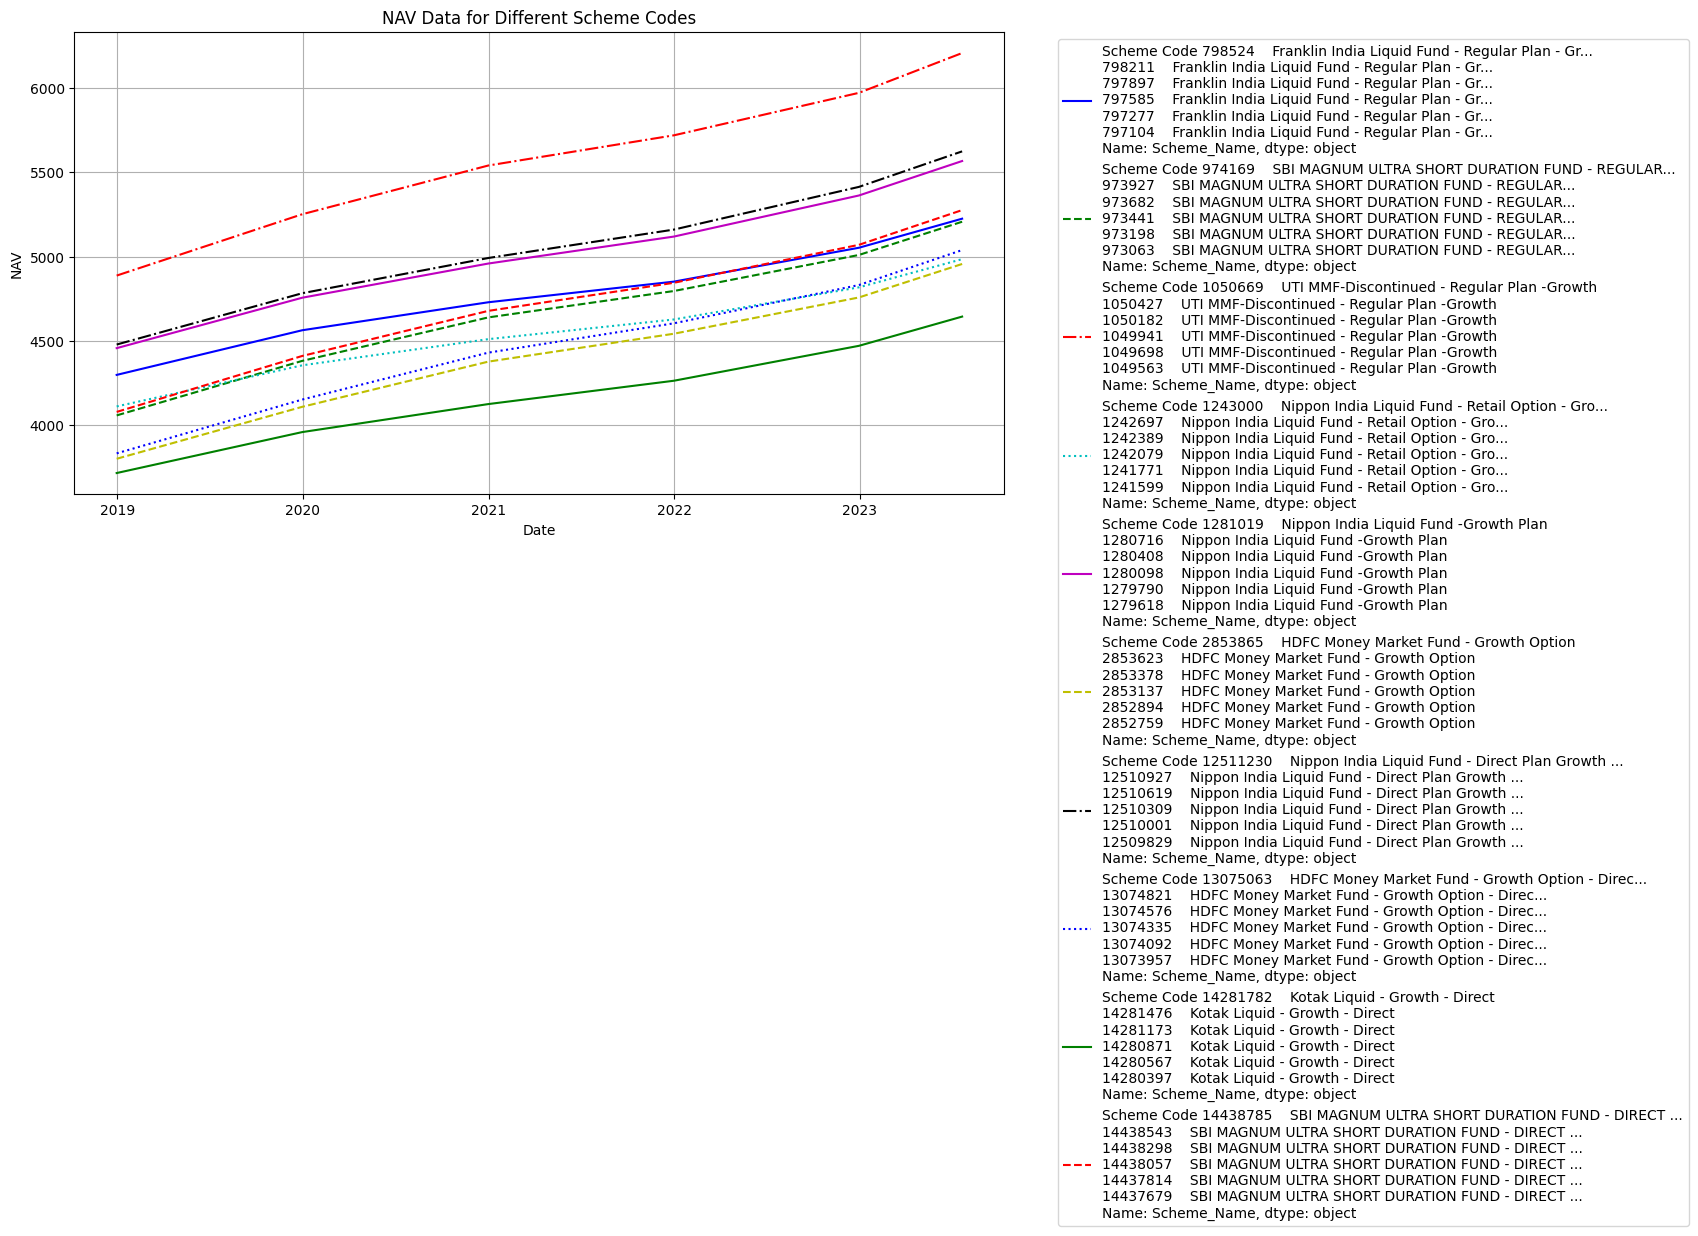

In [169]:
import matplotlib.pyplot as plt

# Assuming you have the 'top_10_schemes_summary' DataFrame
df = top_10_schemes_summary
grouped = df.groupby('Scheme_Code')

# Define line styles and colors
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r']

plt.figure(figsize=(12, 6))  # Set a smaller figure size
for i, (scheme_code, group_data) in enumerate(grouped):
    # Sort the date in order to plot the NAV in ascending order of the dates for forecasting the future
    group_data = group_data.sort_values(by='Date')
    plt.plot(group_data.Date, group_data['NAV'], label=f'Scheme Code {group_data["Scheme_Name"]}', linestyle=line_styles[i], color=colors[i])

plt.xlabel('Date')
plt.ylabel('NAV')
plt.title('NAV Data for Different Scheme Codes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
for scheme_code, group_data in grouped:
    y = group_data['NAV']
    #first degree p-value comes as  stationary
    print('p-value: ', adfuller(y)[1])

In [ ]:
groups = mf.groupby('Scheme_Code')
sorted_mf = groups.apply(lambda x:x.sort_values(by ='Date', ascending = False))

In [ ]:
#Computing return on the entire mutual fund dataset maintaing the descending order of teh date. Hence the -1
# Filter Records where NAV is 0
mf = sorted_mf[sorted_mf['NAV']!=0]
# Compute Returns
mf['return']=mf.groupby(['Scheme_Name'])['NAV'].pct_change(periods=-1)


In [ ]:
mf

In [ ]:
import matplotlib.pyplot as plt
import ydata_profiling as pp
import seaborn as sns
import warnings
import os

pp.ProfileReport(mf)

In [ ]:
# Convert Date Column as String to Date format
mf['Date'] = pd.to_datetime(mf['Date'],format='%d-%m-%Y')
mf.head(5)

In [ ]:
df = df[df['NAV']!=0]
df['Date'] = pd.to_datetime(df['Date'])


# Reset index since now df has index as scheme_code and column as scheme_code leading to confusion 
#to compute returns
df.reset_index(drop=True, inplace=True)


# Group the data by the scheme code and sort within each group
df = df.groupby('Scheme_Code').apply(lambda x: x.sort_values(by='Date'))



# Compute Returns within each group
df['return'] = df.groupby('Scheme_Code')['NAV'].transform(lambda x: x.pct_change(periods=1))

# Reset index if needed
#df.reset_index(drop=True, inplace=True)
#print(df)



In [ ]:
#We are checking timeseries of only one simple fundhouse with 2 schemes for stationarity.
#Here we will compute the returns column based on NAV and use it to find stationarity
#useing the same df from above. Removed teh first record where returns will be Nan
df = df.dropna(subset=['return'])
df = df[df['return']!=0]
y = df['return'] 
grouped = df.groupby('Scheme_Code')
plt.figure(figsize=(10, 10))  # Set the figure size
for scheme_code, group_data in grouped:
    #sorted the date in order for us to plot the NAV 
    #in ascending order of the dates for forecasting future
    #group_data = group_data.sort_values(by='Date') #Done already
    plt.plot(group_data.Date, group_data['return'], label=f'Scheme Code {scheme_code}')

plt.xlabel('Data Point Index')
plt.ylabel('return')
plt.title('return Data for Different Scheme Codes')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

In [ ]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima_list = []
for scheme_code, group_data in grouped:
    y = group_data['return']
    # 1. initialize the model
    arima = ARIMA(y, order=(1, 1, 2), trend='t')

    # 2. fit the models
    arima = arima.fit()
    arima_list.append(arima)

    print(arima.summary())

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# Actual vs Fitted
for arima in arima_list:
    plot_predict(arima, start=1, dynamic=False);
    plt.ylim((.9 * y.min(), 1.1 * y.max()));

Clearly returns was not stationary as well. Let us use the same approach but, instead of returns, we compute logarithamic returns of NAV below

In [ ]:
df = df[df['NAV']!=0]
df['Date'] = pd.to_datetime(df['Date'])


# Reset index since now df has index as scheme_code and column as scheme_code leading to confusion 
#to compute returns
df.reset_index(drop=True, inplace=True)


# Group the data by the scheme code and sort within each group
df = df.groupby('Scheme_Code').apply(lambda x: x.sort_values(by='Date'))



# Calculate logarithmic returns
df['Log_Return'] = df.groupby('Scheme_Code')['NAV'].apply(lambda x: np.log(x / x.shift(1)))

# Reset index if needed
#df.reset_index(drop=True, inplace=True)


In [ ]:
#We are checking timeseries of only one simple fundhouse with 2 schemes for stationarity.
#Here we will compute the LOG of returns column based on NAV and use it to find stationarity
#useing the same df from above. Removed teh first record where returns will be Nan
df = df.dropna(subset=['Log_Return'])
df = df[df['Log_Return']!=0]
y = df['Log_Return'] 
grouped = df.groupby('Scheme_Code')
plt.figure(figsize=(10, 10))  # Set the figure size
for scheme_code, group_data in grouped:
    #sorted the date in order for us to plot the NAV 
    #in ascending order of the dates for forecasting future
    #group_data = group_data.sort_values(by='Date') #Done already
    plt.plot(group_data.Date, group_data['Log_Return'], label=f'Scheme Code {scheme_code}')

plt.xlabel('Data Point Index')
plt.ylabel('Log_Return')
plt.title('Log_Return Data for Different Scheme Codes')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['Log_Return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

In [ ]:
#second degree p-value comes as non stationary
for scheme_code, group_data in grouped:
    y = group_data['Log_Return']
    print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])
    #WE ARE EXPECTING p-value to be less than 0.05 for the series to be stationary.

Well apparently, these p values are super small since beginning and are indicating stationarity. Notice teh e-x, #Double Check

In [ ]:
# Analysis of quant Tax Plan - Growth Option - Regular Plan
analysis_df = mf[mf['Scheme_Name']=='quant Tax Plan - Growth Option - Regular Plan'][['Scheme_Name','Date','NAV','return']]
analysis_df.sort_values('Date',inplace=True)
analysis_df = analysis_df.set_index('Date')
Portfolio = analysis_df['Scheme_Name'][1]
analysis_df.plot(y='NAV',kind='line',figsize=(15,5))
plt.xlabel('Period')
plt.ylabel('NAV')
plt.title('Plot of NAV over Time for ' + Portfolio)
plt.show()

In [ ]:
analysis_df

In [ ]:
# Compute correlation matrix
corr = mf.corr()

# Generate heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()
